In [4]:
import sys
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar




In [5]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
df=pd.read_csv(r'C:\padhma\GUVI_CLASS_AUG2025\Projects\Amazon-Sales\cleaned.csv')
df.head()



,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating,corrected_price
0,TXN_2023_00063013,2023-07-23,CUST_2023_00018393,PROD_000454,Vivo Y95 64GB Black,Electronics,Smartphones,Vivo,27340.84,21.57,21442.59,1,21442.59,0.0,21442.59,Kolkata,West Bengal,Metro,Standard,36-45,Cash,3.0,Standard,False,False,No Festival,4.0,Delivered,7,2023,3,0.20,True,3.5,27340.84
1,TXN_2021_00064486,2021-07-20,CUST_2015_00002865,PROD_000579,Realme Realme 3 128GB Black,Electronics,Smartphones,Realme,32907.49,0.00,32907.49,3,98722.47,0.0,98722.47,Ludhiana,Punjab,Tier2,Standard,26-35,UPI,3.0,Standard,False,False,No Festival,4.5,Delivered,7,2021,3,0.21,False,4.5,32907.49
2,TXN_2017_00065617,2017-11-16,CUST_2016_00004057,PROD_000295,Vivo V7 32GB Blue,Electronics,Smartphones,Vivo,47052.18,21.91,36741.38,1,36741.38,0.0,36741.38,Bengaluru,Karnataka,Metro,Premium,36-45,Card,6.0,Standard,False,False,No Festival,5.0,Delivered,11,2017,4,0.24,True,4.3,47052.18
3,TXN_2020_00054393,2020-05-04,CUST_2020_00014574,PROD_001654,Alienware Pavilion 4GB RAM Silver,Electronics,Laptops,Alienware,238725.44,59.60,96456.27,1,96456.27,0.0,96456.27,Bengaluru,Karnataka,Metro,Premium,46-55,UPI,3.0,Standard,False,True,Summer Sale,5.0,Delivered,5,2020,2,1.85,True,3.6,238725.44
4,TXN_2018_00071646,2018-10-09,CUST_2018_00006275,PROD_000095,Motorola Moto X Play 16GB White,Electronics,Smartphones,Motorola,25970.76,0.00,25970.76,1,25970.76,0.0,25970.76,Kochi,Kerala,Tier2,Standard,18-25,Cash,4.0,Standard,False,False,No Festival,4.0,Delivered,10,2018,4,0.16,False,3.7,25970.76


In [11]:
df.shape

(1116389, 35)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116389 entries, 0 to 1116388
Data columns (total 35 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1116389 non-null  object 
 1   order_date              1116389 non-null  object 
 2   customer_id             1116389 non-null  object 
 3   product_id              1116389 non-null  object 
 4   product_name            1116389 non-null  object 
 5   category                1116389 non-null  object 
 6   subcategory             1116389 non-null  object 
 7   brand                   1116389 non-null  object 
 8   original_price_inr      1116389 non-null  float64
 9   discount_percent        1116389 non-null  float64
 10  discounted_price_inr    1116389 non-null  float64
 11  quantity                1116389 non-null  int64  
 12  subtotal_inr            1116389 non-null  float64
 13  delivery_charges        1116389 non-null  float64
 14  fi

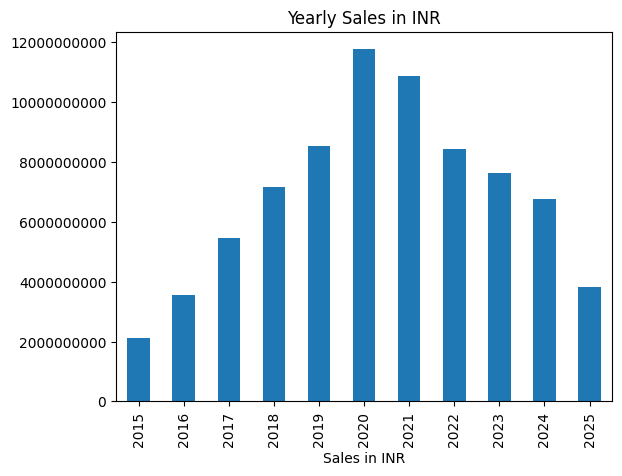

In [ ]:
#1 Yearly revenue growth from 2015-2025
yearly_sales = df.groupby("order_year")["final_amount_inr"].sum()
yearly_sales.plot(kind="bar", title="Yearly Sales in INR")
plt.xlabel("Year")
plt.xlabel("Sales in INR")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Insight 
1) 2020 sales was at peak.
2) 2015 sales was lowest

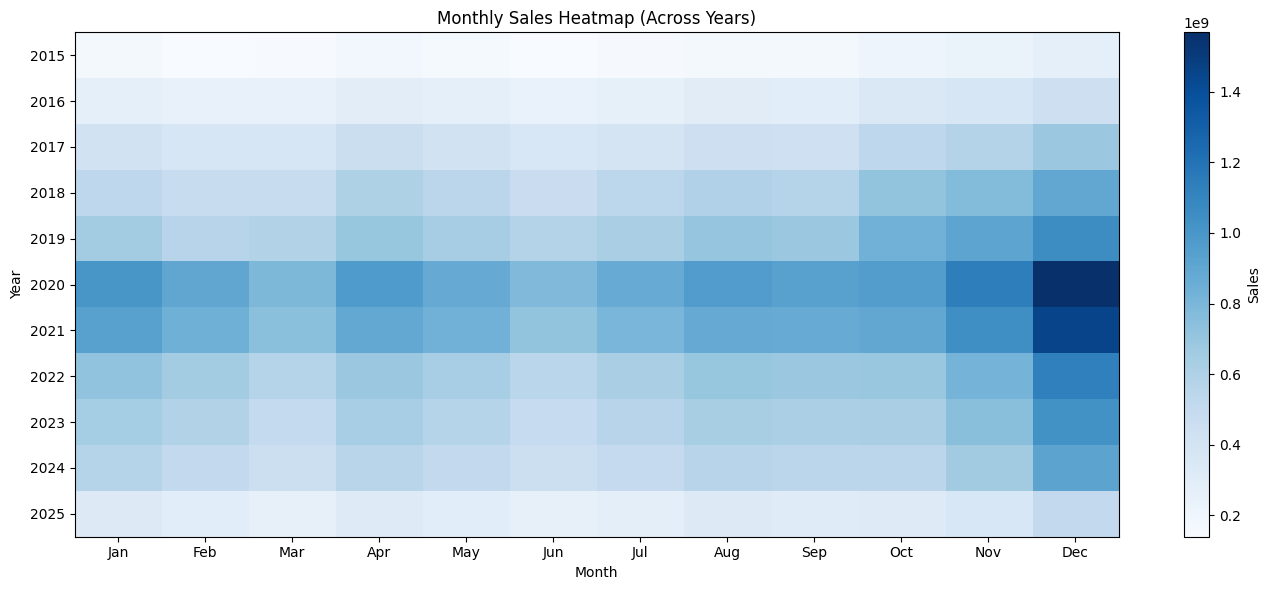

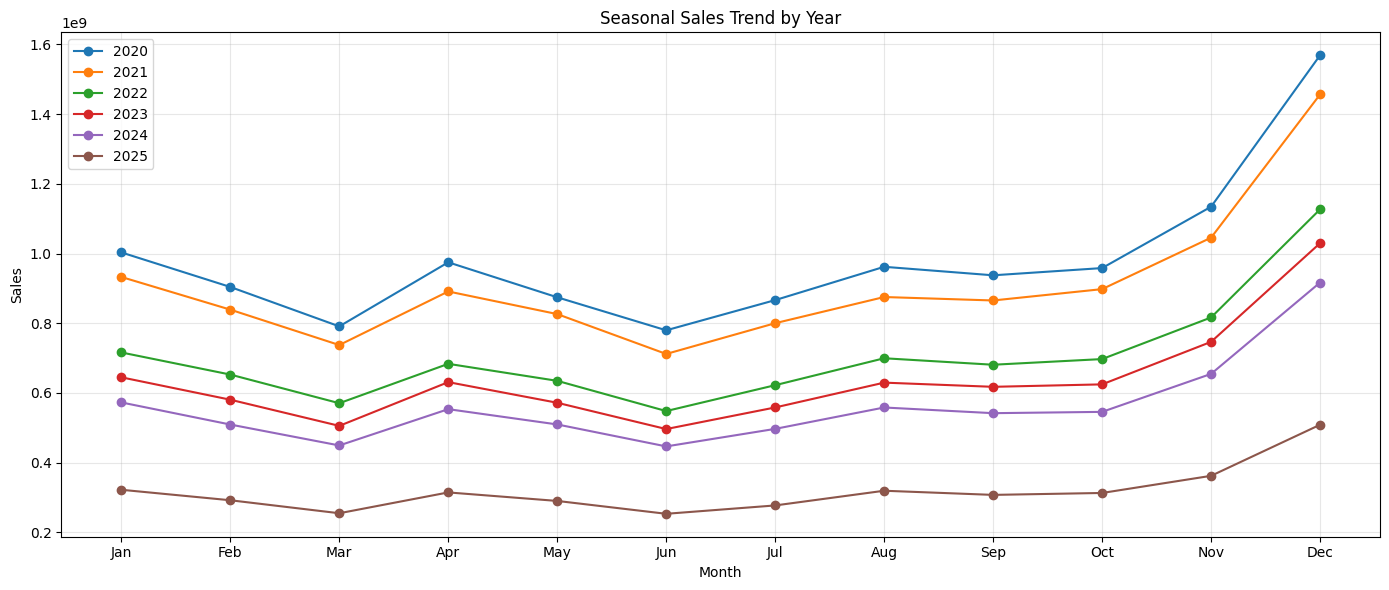

In [ ]:
#2 seasonal patterns in sales data.

# MONTHLY HEATMAP

monthly = df.groupby(["order_year", "order_month"])["final_amount_inr"].sum().unstack().fillna(0)
months = [calendar.month_abbr[m] for m in range(1, 13)]

plt.figure(figsize=(14, 6))
plt.imshow(monthly.values, aspect="auto", cmap="Blues")
plt.colorbar(label="Sales")

plt.xticks(range(12), months)
plt.yticks(range(len(monthly.index)), monthly.index)

plt.title("Monthly Sales Heatmap (Across Years)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.tight_layout()
plt.show()


# YEARLY SEASONAL COMPARISON

plt.figure(figsize=(14, 6))

years = sorted(df["order_year"].unique())

for y in years[-6:]:   # last 6 years
    series = df[df["order_year"] == y].groupby("order_month")["final_amount_inr"].sum()
    plt.plot(range(1, 13), series, marker="o", label=str(y))

plt.xticks(range(1, 12 + 1), months)
plt.title("Seasonal Sales Trend by Year")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()





INSIGHTS

1. Sales peak in Q4 (Oct–Dec) every year.

November & December show the highest sales.This aligns with India’s major festive + sale seasons:

Diwali,Dussehra,Great Indian Festival,Black Friday / Cyber Monday,Christmas & New Year

2. Sales dip in Q2 (Apr–Jun).

April, May, and June consistently show a slowdown.This is typically:Off-season period

3.Year-over-Year Growth Insight Summary

2020: Massive surge (pandemic-driven)

2021: High but slightly lower than 2020

2022 → 2024: Decline but stable seasonality

2025: Lowest since 2018



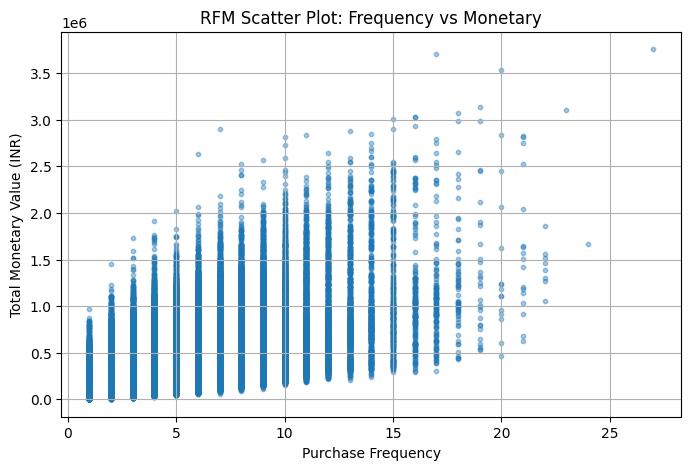

In [10]:
#3 Customer Segmentation 

rfm_df = df.groupby('customer_id').agg(
    Frequency=('transaction_id', 'count'),
    Monetary=('final_amount_inr', 'sum')
).reset_index()



plt.figure(figsize=(8,5))

plt.scatter(
    rfm_df["Frequency"],
    rfm_df["Monetary"],
    alpha=0.4, 
    s=10         
)

plt.xlabel("Purchase Frequency")
plt.ylabel("Total Monetary Value (INR)")
plt.title("RFM Scatter Plot: Frequency vs Monetary")
plt.grid(True)
plt.show()




INSIGHTS:

1. purchase frequency increases, total monetary value also increases. strong loyalty → revenue linkage.
   Customers who buy more often also spend more money overall.
2. High-Value Customers Cluster at Frequency 10–20
3. Low-Frequency Buyers 1 to 5 with monetary = ₹0 to ₹5 lakh
4. Maximum customer repeat purchase count is ~27 orders across the time period

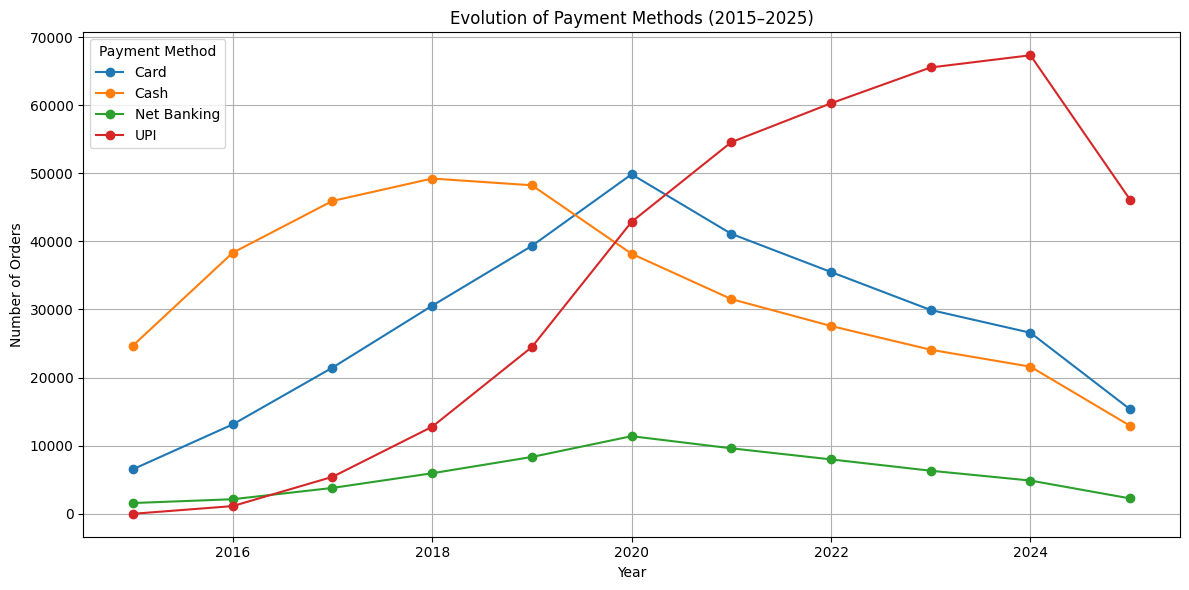

In [24]:
#4 Evolution of payment methods from 2015-2025. 
df.columns
payment_trends = df.groupby(['order_year', 'payment_method']).size().reset_index(name='total_orders')
pivot_df = payment_trends.pivot(index='order_year',
                                columns='payment_method',
                                values='total_orders').fillna(0)
plt.figure(figsize=(12, 6))

for col in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[col], marker='o', label=col)

plt.xlabel("Year")
plt.ylabel("Number of Orders")
plt.title("Evolution of Payment Methods (2015–2025)")
plt.legend(title="Payment Method")
plt.grid(True)
plt.tight_layout()
plt.show()


INSIGHTS:

1) UPI Became the Dominant Payment Method
2) Cash on Delivery (COD) Declined Sharply
3) Net Banking Was Always Low and Keeps Falling

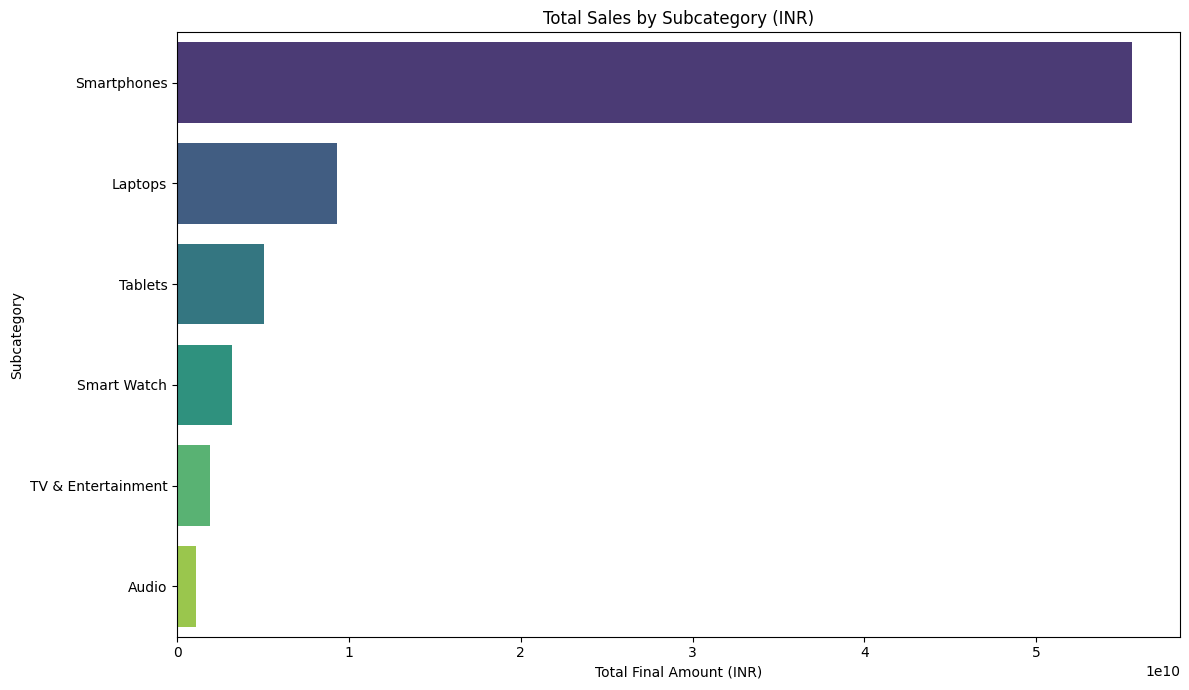

In [11]:
#5 category-wise performance analysis
# 5.1 subcategory-wise sales analysis


# Group by subcategory and sum the final_amount_inr
subcategory_sales = df.groupby('subcategory')['final_amount_inr'].sum().sort_values(ascending=False).reset_index()

# Create the bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x='final_amount_inr', y='subcategory', data=subcategory_sales, hue='subcategory', palette='viridis', legend=False)
plt.title('Total Sales by Subcategory (INR)')
plt.xlabel('Total Final Amount (INR)')
plt.ylabel('Subcategory')
plt.tight_layout()
plt.show()

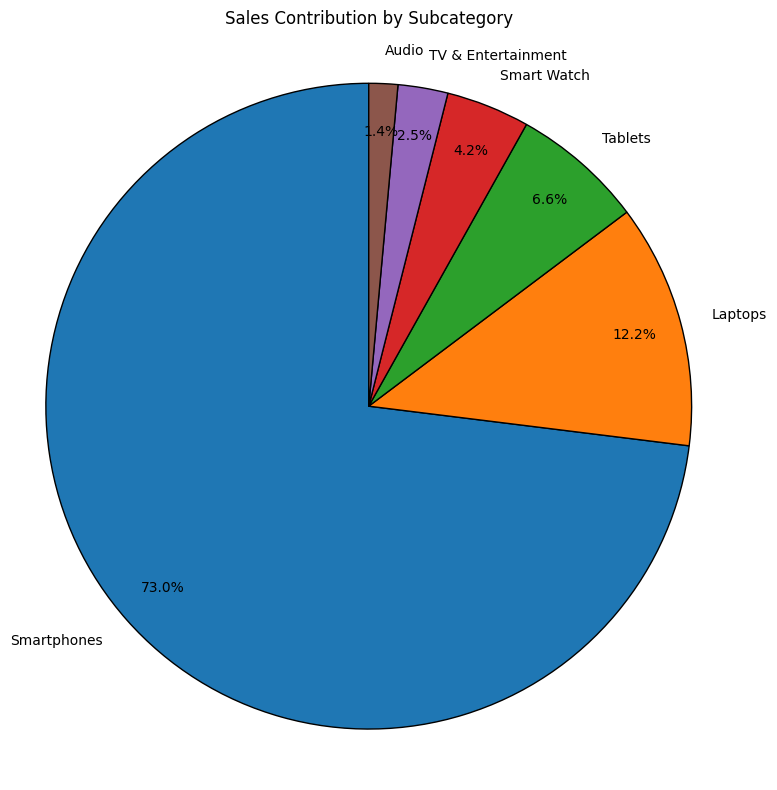

In [ ]:
# 5.2 subcategory sales contribution pie chart

pie_data = subcategory_sales['final_amount_inr']
pie_labels = subcategory_sales['subcategory']

# Create the pie chart
plt.figure(figsize=(8,8))
plt.pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops={'edgecolor': 'black'})
plt.title('Sales Contribution by Subcategory')
plt.axis('equal') 
plt.tight_layout()
plt.show()

INSIGHTS:

1) Smartphone tops the sales.
2) Audio categaory is least in sales.

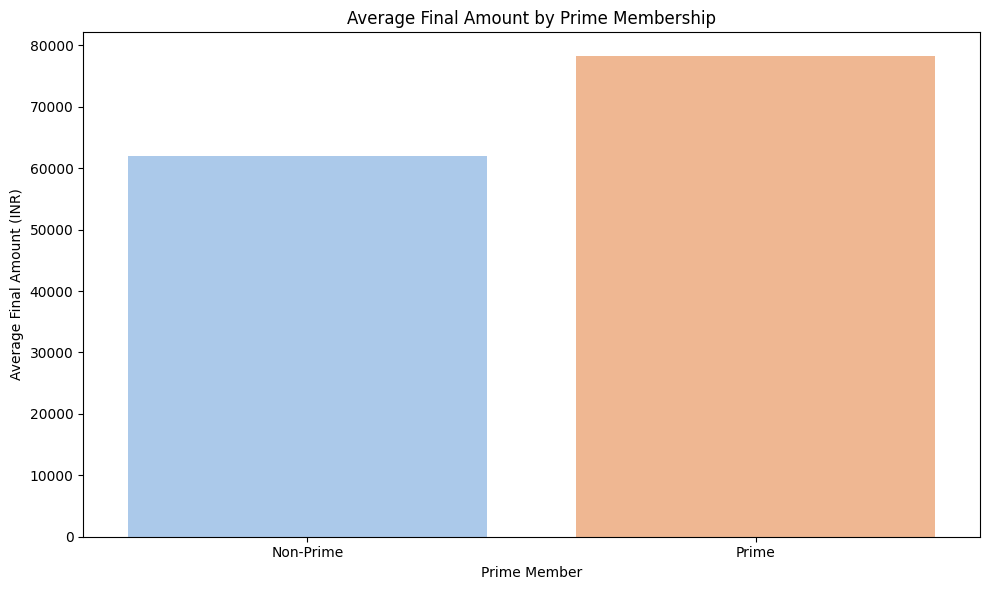

In [ ]:
#6  Prime membership impact on customer behavior

# Calculate the average final_amount_inr and corrected_price for prime vs non-prime members
prime_impact = df.groupby('is_prime_member')['final_amount_inr'].mean().reset_index()

# Plot the impact on final_amount_inr
plt.figure(figsize=(10, 6))
sns.barplot(x='is_prime_member', y='final_amount_inr', data=prime_impact, hue='is_prime_member', palette='pastel', legend=False)
plt.title('Average Final Amount by Prime Membership')
plt.xlabel('Prime Member')
plt.ylabel('Average Final Amount (INR)')
plt.xticks([0, 1], ['Non-Prime', 'Prime'])
plt.tight_layout()
plt.show()

INSIGHTS:
1) Prime Members Spend Significantly More
2) Prime customers place larger orders or buy more items per purchase Or they buy higher-value categories

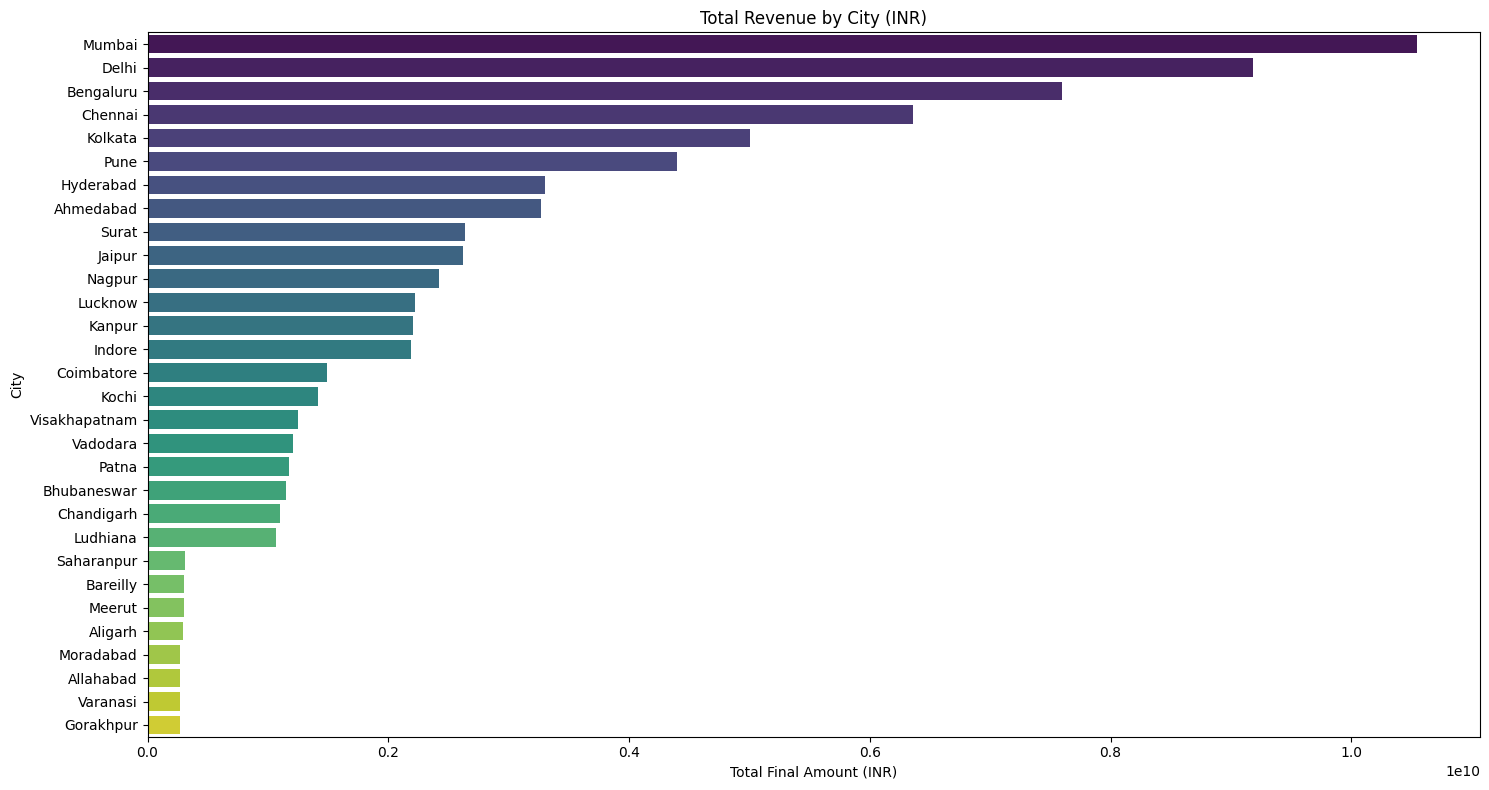

In [ ]:
#7 sales performance across Indian cities
city_sales = df.groupby('customer_city')['final_amount_inr'].sum().sort_values(ascending=False).reset_index()
# Bar Chart howing revenue density and growth patterns by city

city_sales = df.groupby('customer_city')['final_amount_inr'].sum().sort_values(ascending=False).reset_index()

# Create the bar chart
plt.figure(figsize=(15, 8))
sns.barplot(x='final_amount_inr', y='customer_city', data=city_sales, hue='customer_city', palette='viridis', legend=False)
plt.title('Total Revenue by City (INR)')
plt.xlabel('Total Final Amount (INR)')
plt.ylabel('City')
plt.tight_layout()
plt.show()




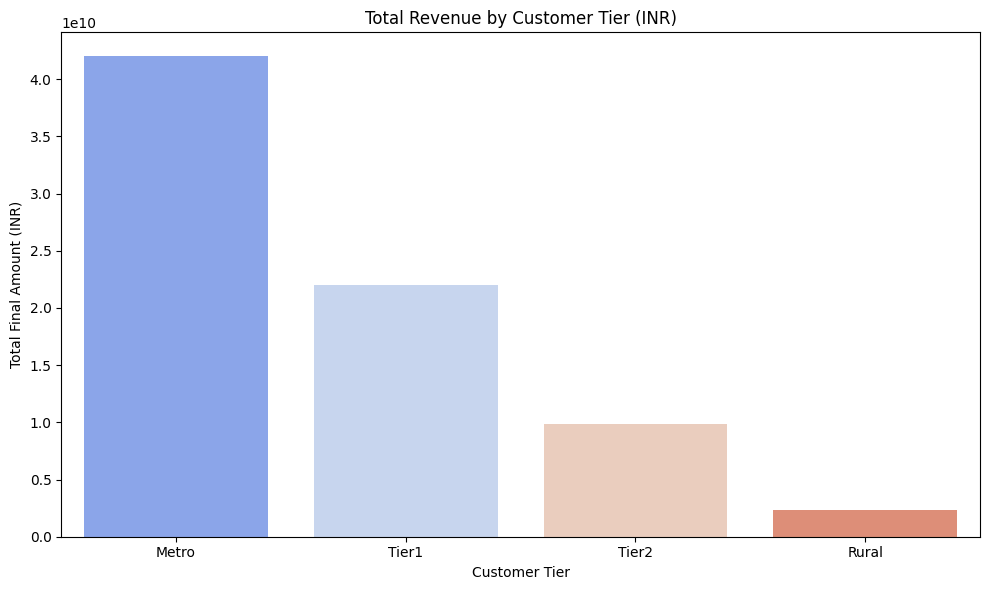

In [15]:
# Bar charts showing revenue density and growth patterns by tier (Metro/Tier1/Tier2/Rural)

# Group by customer_tier and sum the final_amount_inr
tier_revenue = df.groupby('customer_tier')['final_amount_inr'].sum().sort_values(ascending=False).reset_index()

# Create the bar chart for revenue density by tier
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_tier', y='final_amount_inr', data=tier_revenue, hue='customer_tier', palette='coolwarm', legend=False)
plt.title('Total Revenue by Customer Tier (INR)')
plt.xlabel('Customer Tier')
plt.ylabel('Total Final Amount (INR)')
plt.tight_layout()
plt.show()

C:\Users\harih\AppData\Local\Temp\ipykernel_27500\1171060789.py:4: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce', dayfirst=True)


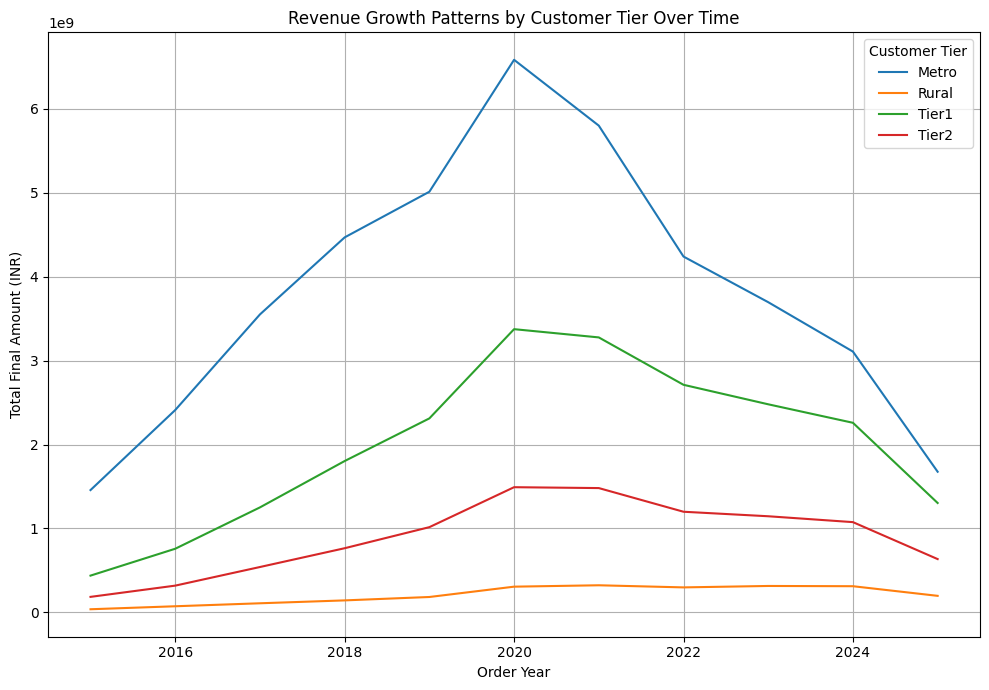

In [ ]:
#growth patterns by tier (Metro/Tier1/Tier2/Rural)

# Convert 'order_date' to datetime objects
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce', dayfirst=True)

# Drop rows where 'order_date' conversion failed (NaT)
df_cleaned = df.dropna(subset=['order_date']).copy()
df_cleaned['order_year'] = df_cleaned['order_date'].dt.year
# Group by customer_tier and order_date and sum the final_amount_inr
tier_growth = df_cleaned.groupby(['customer_tier', 'order_year'])['final_amount_inr'].sum().reset_index()

# Create the line chart for growth patterns by tier
plt.figure(figsize=(10, 7))
sns.lineplot(x='order_year', y='final_amount_inr', hue='customer_tier', data=tier_growth)
plt.title('Revenue Growth Patterns by Customer Tier Over Time')
plt.xlabel('Order Year')
plt.ylabel('Total Final Amount (INR)')
plt.grid(True)
plt.legend(title='Customer Tier')
plt.tight_layout()
plt.show()

INSIGHTS:

1) Mumbai revenue is highest
2) Metro cities revenue is higher than other cities.

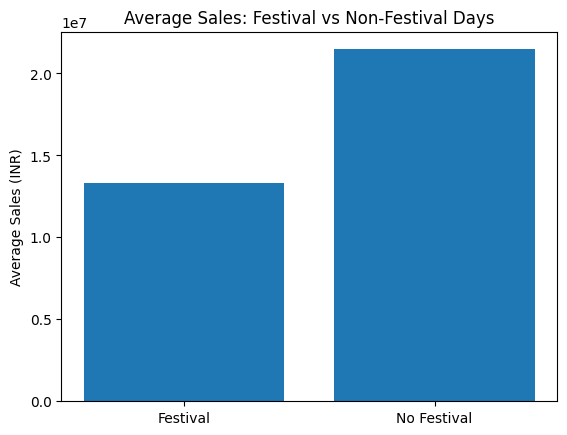

In [ ]:
#8 Festival sale analysis

festivals_df = df.groupby('order_date').agg(
    total_sales=('final_amount_inr', 'sum'),
    festival_name=('festival_name', 'first')
).reset_index()

# Replace specific festival names with 'Festival' for better grouping in the plot
festivals_df['festival_name'] = festivals_df['festival_name'].apply(lambda x: 'Festival' if x != 'No Festival' else 'No Festival')

avg_sales = festivals_df.groupby("festival_name")["total_sales"].mean()

plt.bar(avg_sales.index, avg_sales.values)
plt.title("Average Sales: Festival vs Non-Festival Days")
plt.ylabel("Average Sales (INR)")
plt.show()


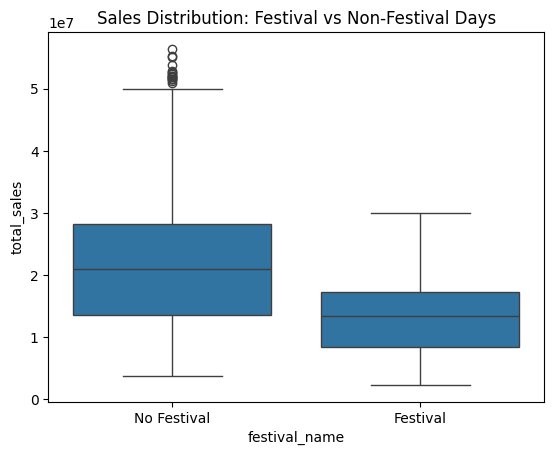

In [19]:
sns.boxplot(x="festival_name", y="total_sales", data=festivals_df)
plt.title("Sales Distribution: Festival vs Non-Festival Days")
plt.show()

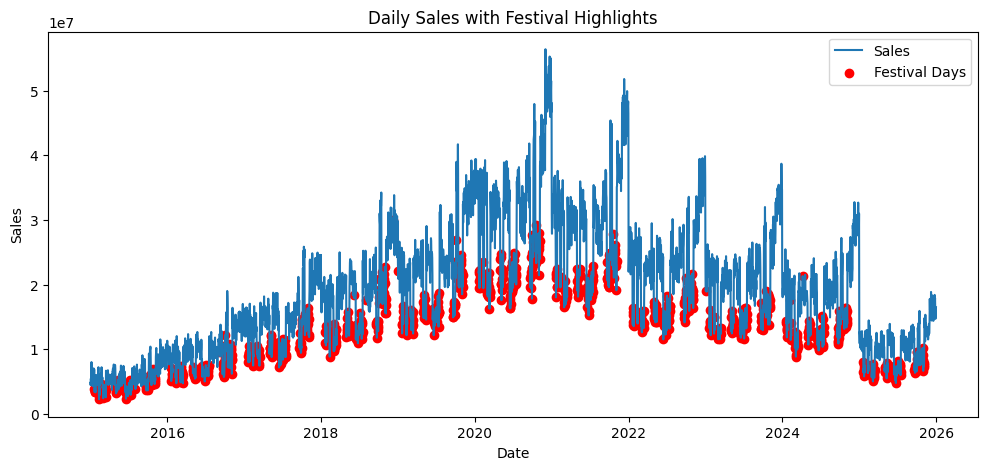

In [20]:
plt.figure(figsize=(12,5))
plt.plot(festivals_df["order_date"], festivals_df["total_sales"], label="Sales")
plt.scatter(
    festivals_df[festivals_df["festival_name"]=="Festival"]["order_date"],
    festivals_df[festivals_df["festival_name"]=="Festival"]["total_sales"],
    color='red',
    label="Festival Days"
)

plt.title("Daily Sales with Festival Highlights")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


INSIGHTS:

1) Non-Festival days show higher average sales compared to festival days.
2) There are many high-value outliers on non-festival days.
3) Sales show a strong yearly seasonality

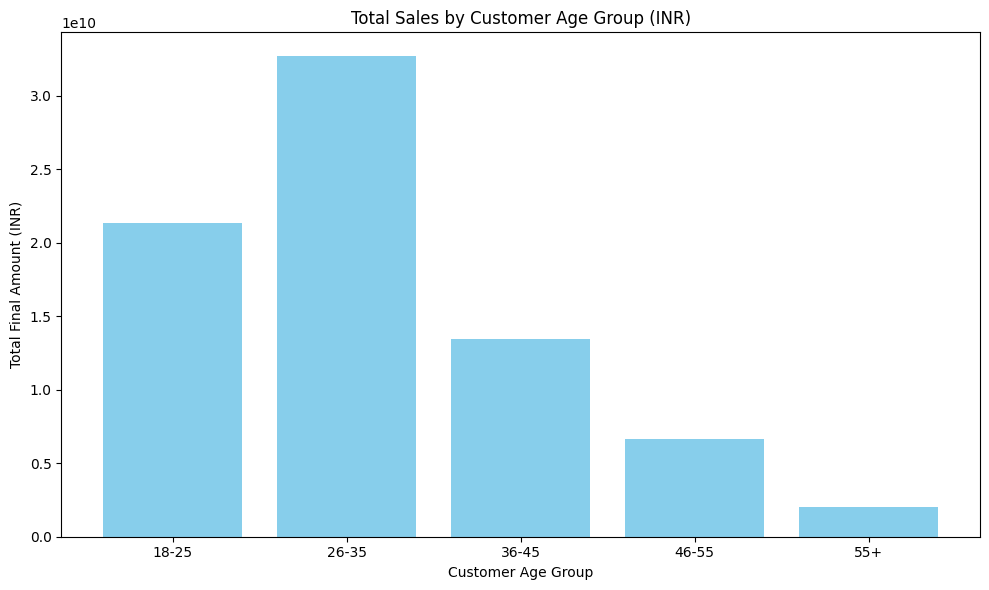

In [25]:
#9 customer age group behavior and preferences.
age_group_sales = df.groupby('customer_age_group')['final_amount_inr'].sum().reset_index()
# Bar chart for sales by customer age group
plt.figure(figsize=(10, 6))
plt.bar(age_group_sales['customer_age_group'], age_group_sales['final_amount_inr'], color='skyblue')
plt.title('Total Sales by Customer Age Group (INR)')
plt.xlabel('Customer Age Group')
plt.ylabel('Total Final Amount (INR)')
plt.tight_layout()
plt.show()

#INSIGHTS:
1) Customer in age group 26-35 are the high potential customers for products.
2) 55+ age group customer are low key customers.

In [29]:
df.columns
#df['subcategory'].value_counts()

Index(['transaction_id', 'order_date', 'customer_id', 'product_id',
       'product_name', 'category', 'subcategory', 'brand',
       'original_price_inr', 'discount_percent', 'discounted_price_inr',
       'quantity', 'subtotal_inr', 'delivery_charges', 'final_amount_inr',
       'customer_city', 'customer_state', 'customer_tier',
       'customer_spending_tier', 'customer_age_group', 'payment_method',
       'delivery_days', 'delivery_type', 'is_prime_member', 'is_festival_sale',
       'festival_name', 'customer_rating', 'return_status', 'order_month',
       'order_year', 'order_quarter', 'product_weight_kg', 'is_prime_eligible',
       'product_rating', 'corrected_price'],
      dtype='object')

In [30]:
#10 price vs demand analysis 

# Create demand column (each row = 1 order)
df['demand'] = 1

# Group by subcategory and year
price_demand = df.groupby(['subcategory', 'order_year']).agg(
    avg_price=('final_amount_inr', 'mean'),
    total_demand=('demand', 'sum')
).reset_index()

print(price_demand.head())

  subcategory  order_year     avg_price  total_demand
0       Audio        2015  15290.587984          1151
1       Audio        2016  16580.447093          2343
2       Audio        2017  19435.151319          2994
3       Audio        2018  20022.772986          3892
4       Audio        2019  21280.800318          4653


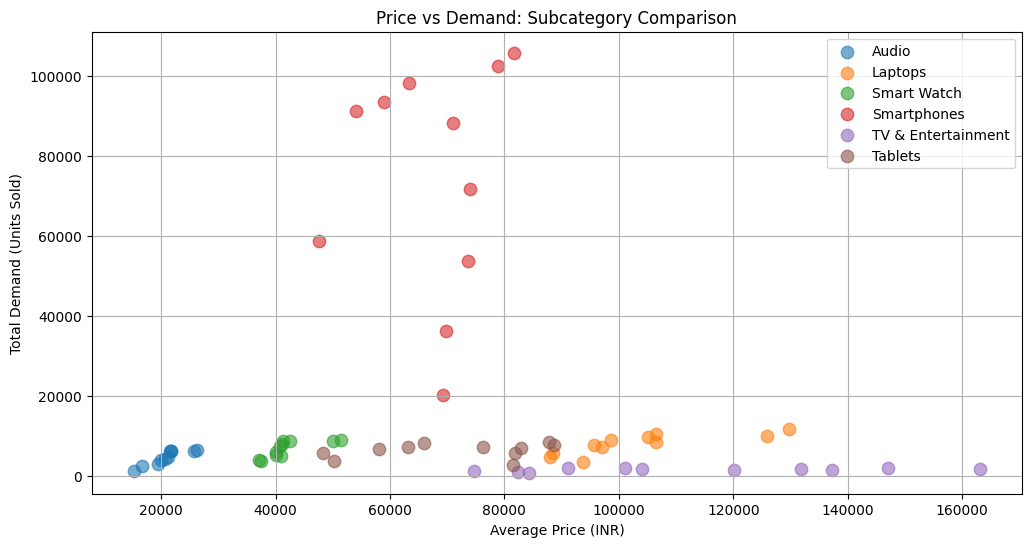

In [31]:
subcategories = price_demand['subcategory'].unique()

plt.figure(figsize=(12, 6))

for sub in subcategories:
    temp = price_demand[price_demand['subcategory'] == sub]
    plt.scatter(temp['avg_price'], temp['total_demand'], s=80, alpha=0.6, label=sub)

plt.xlabel("Average Price (INR)")
plt.ylabel("Total Demand (Units Sold)")
plt.title("Price vs Demand: Subcategory Comparison")
plt.legend()
plt.grid(True)
plt.show()

INSIGHTS:

1) Smartphones with price 55000 - 80000 demand are high.
2) TV & Entertainment demand is stab;e over price.
3) Laptop demand is for price 80000 to 110000